# Keras Experiments

Ionosphere pattern prediction from https://archive.ics.uci.edu/ml/datasets/Ionosphere. Detect patterns in radar returns.

In [2]:
%matplotlib inline

import typing

from os.path import join, exists, isdir, isfile, split

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

from IPython.display import Image, display

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

np.random.seed(100)

In [3]:
ion = pd.read_csv(join('ionosphere', 'ionosphere.data.txt'), header=None)
cols = ['col_{}'.format(i) for i in range(ion.shape[1])]
ion.columns = cols

## What does the data look like?

In [4]:
ion.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
X = ion[['col_{}'.format(i) for i in range(ion.shape[1] - 1)]]
display(X.shape)
y = ion['col_34'].apply(lambda x: 1 if x == 'g' else 0)
display(y.shape)
X.head()

(351, 34)

(351,)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [6]:
model = Sequential()
model.add(Dense(12, input_dim=34, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X.values, y.values, epochs=150, batch_size=10)

Epoch 1/150
351/351 [==============================] - 0s - loss: 0.6909 - acc: 0.6410     
Epoch 2/150
351/351 [==============================] - 0s - loss: 0.6844 - acc: 0.6410     
Epoch 3/150
351/351 [==============================] - 0s - loss: 0.6657 - acc: 0.6752     
Epoch 4/150
351/351 [==============================] - 0s - loss: 0.6150 - acc: 0.7806     
Epoch 5/150
351/351 [==============================] - 0s - loss: 0.5288 - acc: 0.8490     
Epoch 6/150
351/351 [==============================] - 0s - loss: 0.4299 - acc: 0.8832     
Epoch 7/150
351/351 [==============================] - 0s - loss: 0.3516 - acc: 0.8946     
Epoch 8/150
351/351 [==============================] - 0s - loss: 0.2988 - acc: 0.9117     
Epoch 9/150
351/351 [==============================] - 0s - loss: 0.2560 - acc: 0.9231     
Epoch 10/150
351/351 [==============================] - 0s - loss: 0.2281 - acc: 0.9288     
Epoch 11/150
351/351 [==============================] - 0s - loss: 0.2068 - acc

351/351 [==============================] - 0s - loss: 0.0209 - acc: 0.9972     
Epoch 90/150
351/351 [==============================] - 0s - loss: 0.0215 - acc: 0.9972        
Epoch 91/150
351/351 [==============================] - 0s - loss: 0.0213 - acc: 0.9972     
Epoch 92/150
351/351 [==============================] - 0s - loss: 0.0201 - acc: 0.9972     
Epoch 93/150
351/351 [==============================] - 0s - loss: 0.0199 - acc: 0.9972     
Epoch 94/150
351/351 [==============================] - 0s - loss: 0.0195 - acc: 0.9972     
Epoch 95/150
351/351 [==============================] - 0s - loss: 0.0202 - acc: 0.9972     
Epoch 96/150
351/351 [==============================] - 0s - loss: 0.0192 - acc: 0.9972     
Epoch 97/150
351/351 [==============================] - 0s - loss: 0.0202 - acc: 0.9972     
Epoch 98/150
351/351 [==============================] - 0s - loss: 0.0185 - acc: 0.9972     
Epoch 99/150
351/351 [==============================] - 0s - loss: 0.0190 - acc:

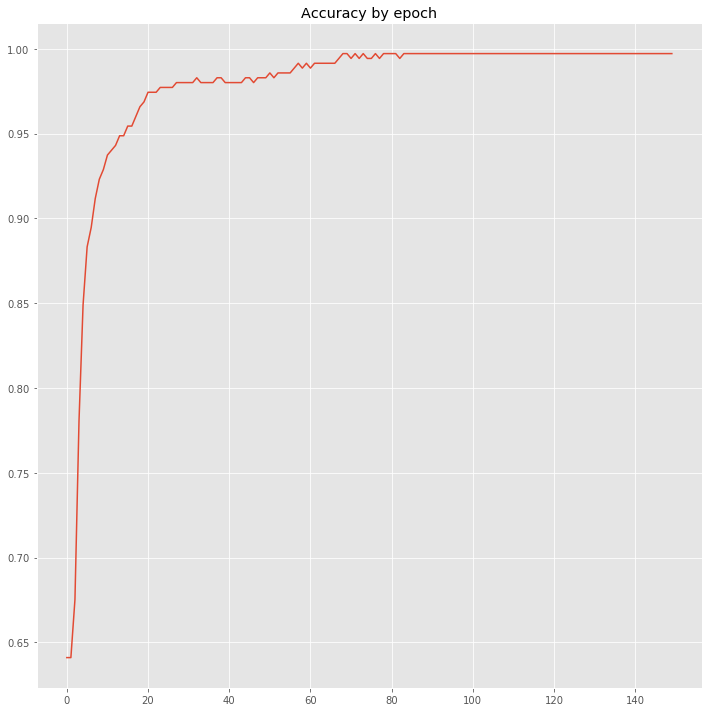

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
ax.plot(history.history['acc'])
ax.set_title('Accuracy by epoch')
plt.tight_layout()